In [53]:
#
# IMPORTING libraries required
#

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests

#
# Set style for charts - using grey grid
#

plt.style.use('ggplot')

In [54]:
#
# USER DEFINED functions required
#
# This function takes a time string (with Hours and Minutes and converts it to an integer - number of minutes
# This function is used during the analysis of MOVIE data
#
def convert_to_int(timestr):
    
    hrs = timestr.str.extract('(\d+) hr', expand=False).astype(float) * 60
    mins = timestr.str.extract('(\d+) min', expand=False).astype(float)

    time_int = hrs.add(mins, fill_value=0).astype(int)
    return time_int


#
# This USER DEFINED function takes two currency codes as parameters and finds the exchange rate using the ALpha Vantage API
# The FROM currency is passed in via the 'base' parameter and the TO currency is passed in the 'new' paramater


 
def convert_curr(base,new):
    url="https://www.alphavantage.co/query?function=CURRENCY_EXCHANGE_RATE&from_currency="+base+"&to_currency="+new+"&apikey=CKHV6XI8ZI3ETX1V"
    t=requests.get(url)
    dict=t.json()
    dis_dicts=(dict['Realtime Currency Exchange Rate'])
    exch=(float(dis_dicts['5. Exchange Rate']))
    return exch









In [3]:
#
# IMPORTING first data set which we wiLL save in a dataframe called 'movie'
#
movie  = pd.read_csv("Highest Holywood Grossing Movies.csv")
#
# Get information on dataset
#
print (movie.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  918 non-null    int64 
 1   Title                       918 non-null    object
 2   Movie Info                  918 non-null    object
 3   Distributor                 918 non-null    object
 4   Release Date                800 non-null    object
 5   Domestic Sales (in $)       918 non-null    int64 
 6   International Sales (in $)  918 non-null    int64 
 7   World Sales (in $)          918 non-null    int64 
 8   Genre                       918 non-null    object
 9   Movie Runtime               918 non-null    object
 10  License                     744 non-null    object
dtypes: int64(4), object(7)
memory usage: 79.0+ KB
None


In [55]:
#
# Get information on data
#
print(movie.shape)
#

(918, 14)


In [6]:
#
# Print out top few rows to see what data is in the dataset
#
#movie.tail()
print(movie.head())

   Unnamed: 0                                              Title  \
0           0  Star Wars: Episode VII - The Force Awakens (2015)   
1           1                           Avengers: Endgame (2019)   
2           2                                      Avatar (2009)   
3           3                               Black Panther (2018)   
4           4                      Avengers: Infinity War (2018)   

                                          Movie Info  \
0  As a new threat to the galaxy rises, Rey, a de...   
1  After the devastating events of Avengers: Infi...   
2  A paraplegic Marine dispatched to the moon Pan...   
3  T'Challa, heir to the hidden but advanced king...   
4  The Avengers and their allies must be willing ...   

                           Distributor       Release Date  \
0  Walt Disney Studios Motion Pictures  December 16, 2015   
1  Walt Disney Studios Motion Pictures     April 24, 2019   
2                Twentieth Century Fox  December 16, 2009   
3  Walt Di

In [56]:
#
# Get some summary statistics about movie
#
print(movie.describe())

       Unnamed: 0  Domestic Sales (in $)  International Sales (in $)  \
count  918.000000           9.180000e+02                9.180000e+02   
mean   458.500000           1.677469e+08                2.301434e+08   
std    265.148072           1.040360e+08                2.176011e+08   
min      0.000000           8.036084e+07                2.600000e+02   
25%    229.250000           1.016071e+08                8.845620e+07   
50%    458.500000           1.321351e+08                1.638819e+08   
75%    687.750000           1.913905e+08                2.885577e+08   
max    917.000000           9.366622e+08                2.086739e+09   

       World Sales (in $)  duration_mins  name_length  
count        9.180000e+02     918.000000   918.000000  
mean         3.968668e+08     116.570806    23.830065  
std          3.082629e+08      20.875727    10.224070  
min          8.160000e+07      76.000000     9.000000  
25%          2.005564e+08     100.000000    17.000000  
50%          3.

In [57]:
#
# The Movie Info is not useful so lets drop that column
#
movie.drop(columns=["Movie Info"],inplace=True)


KeyError: "['Movie Info'] not found in axis"

In [9]:
#
# CLEANSING
#
#drop any duplicates
#
movie.drop_duplicates()



,Unnamed: 0,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
...,...,...,...,...,...,...,...,...,...,...
913,913,The Notebook (2004),New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13
914,914,Jimmy Neutron: Boy Genius (2001),Paramount Pictures,"December 21, 2001",80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,NaN
915,915,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,916,The Texas Chainsaw Massacre (2003),New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R


In [58]:
# are there missing values

print(movie.isnull().sum())

Unnamed: 0                      0
Title                           0
Distributor                     0
Release Date                  118
Domestic Sales (in $)           0
International Sales (in $)      0
World Sales (in $)              0
Genre                           0
Movie Runtime                   0
License                         0
duration_mins                   0
sml                             0
main_dist                       0
name_length                     0
dtype: int64


In [59]:
#
# CLEANSING
#
# We can see that the License column and the Release Date have some Null Values
# Can we default or infer ? Can we drop these values ?
# We cannot make any assumptions about the Release Date - we cannot infer.
# If we drop - then losing some valuable data so lets make the assumption if there is no License specified, then
# The license will be 'G'eneral
# replace any Nan values in License column 
#

movie['License'] = movie['License'].fillna('G')
print(movie[['License']])

    License
0     PG-13
1     PG-13
2     PG-13
3         G
4         G
..      ...
913   PG-13
914       G
915   PG-13
916       R
917      PG

[918 rows x 1 columns]


In [60]:
#
# Group data by Distributor and then sum Domestic sales and show list by distributor in descending order
#

grp_dist=movie.groupby('Distributor').agg({'Domestic Sales (in $)':'sum'}).sort_values('Domestic Sales (in $)',ascending=False)
grp_dist


,Domestic Sales (in $)
Distributor,
Walt Disney Studios Motion Pictures,34098331657
Warner Bros.,25891722993
Universal Pictures,19316009134
Twentieth Century Fox,19114852793
Sony Pictures Entertainment (SPE),15764875138
Paramount Pictures,14484465716
DreamWorks,4040554079
New Line Cinema,3454990873
Lionsgate,3424851174


In [61]:
#
# Print out rows where the distibutor is Miramax
#

miramax=movie[movie['Distributor'] == 'Miramax']
miramax


,Unnamed: 0,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,duration_mins,sml,main_dist,name_length
298,298,Chicago (2002),Miramax,"February 26, 2002",170687518,136089214,306776732,"['Comedy', 'Crime', 'Musical']",1 hr 53 min,PG-13,113,Medium,Other,14
346,346,Scary Movie (2000),Miramax,"July 7, 2000",157019771,121000000,278019771,['Comedy'],1 hr 28 min,R,88,Short,Other,18
426,426,Good Will Hunting (1997),Miramax,NaN,138433435,87500000,225933435,"['Drama', 'Romance']",2 hr 6 min,G,126,Medium,Other,24
595,595,Spy Kids (2001),Miramax,"March 30, 2001",112719001,35215179,147934180,"['Action', 'Adventure', 'Comedy', 'Family', 'S...",1 hr 28 min,PG,88,Short,Other,15
628,628,Pulp Fiction (1994),Miramax,"October 14, 1994",107928762,106000000,213928762,"['Crime', 'Drama']",2 hr 34 min,R,154,Long,Other,19
673,673,The Aviator (2004),Miramax,"December 17, 2004",102610330,111109612,213719942,"['Biography', 'Drama']",2 hr 50 min,PG-13,170,Long,Other,18
718,718,Shakespeare in Love (1998),Miramax,"December 11, 1998",100317794,189000000,289317794,"['Comedy', 'Drama', 'History', 'Romance']",2 hr 3 min,R,123,Medium,Other,26
742,742,The Others (2001),Miramax,"August 10, 2001",96522687,113424350,209947037,"['Horror', 'Mystery', 'Thriller']",1 hr 41 min,PG-13,101,Medium,Other,17
748,748,Cold Mountain (2003),Miramax,"December 25, 2003",95636509,77377000,173013509,"['Adventure', 'Drama', 'History', 'Romance', '...",2 hr 34 min,R,154,Long,Other,20


In [62]:
#
# print the Title and Distributor for the first 10 rows using LOC
#

# print (movie.loc[0:9,['Title','Distributor']])
dist_mov=movie.loc[0:9,['Title','Distributor']]
dist_mov



,Title,Distributor
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures
2,Avatar (2009),Twentieth Century Fox
3,Black Panther (2018),Walt Disney Studios Motion Pictures
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures
5,Spider-Man: No Way Home (2021),Sony Pictures Entertainment (SPE)
6,Titanic (1997),Paramount Pictures
7,Jurassic World (2015),Universal Pictures
8,The Avengers (2012),Walt Disney Studios Motion Pictures
9,Star Wars: Episode VIII - The Last Jedi (2017),Walt Disney Studios Motion Pictures


In [63]:

# create a subset of data with just title,distributor and domestic sales and see which have highest sales
#
movie_sub=movie[["Title","Distributor","Domestic Sales (in $)"]]
#
# Sort the data by highest Domestic sales
#

high_sales=movie_sub.sort_values("Domestic Sales (in $)",ascending=False)
high_sales
#


,Title,Distributor,Domestic Sales (in $)
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,936662225
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,858373000
2,Avatar (2009),Twentieth Century Fox,760507625
3,Black Panther (2018),Walt Disney Studios Motion Pictures,700426566
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,678815482
...,...,...,...
913,The Notebook (2004),New Line Cinema,81001787
914,Jimmy Neutron: Boy Genius (2001),Paramount Pictures,80936232
915,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),80574010
916,The Texas Chainsaw Massacre (2003),New Line Cinema,80571655


In [16]:
#
#Count movies made by different  distributors
#
movie_counts_dist = movie["Distributor"].value_counts()
movie_counts_dist

Warner Bros.                           158
Walt Disney Studios Motion Pictures    155
Universal Pictures                     119
Twentieth Century Fox                  117
Sony Pictures Entertainment (SPE)      101
Paramount Pictures                      99
DreamWorks                              21
New Line Cinema                         21
Lionsgate                               19
DreamWorks Distribution                 17
Metro-Goldwyn-Mayer (MGM)               12
TriStar Pictures                         9
Miramax                                  9
Revolution Studios                       8
Columbia Pictures                        7
Dimension Films                          7
The Weinstein Company                    6
Summit Entertainment                     5
Fox Searchlight Pictures                 4
STX Entertainment                        3
Orion Pictures                           3
Screen Gems                              3
United Artists                           2
Focus Featu

In [64]:
#
#pick out rows where domestic sales > 80,00,000,000 and less than 90,000,000
#
dom_sls=movie['Domestic Sales (in $)']
greatest_domestic_sales=movie[np.logical_and(dom_sls > 80000000, dom_sls <90000000)]
greatest_domestic_sales

,Unnamed: 0,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,duration_mins,sml,main_dist,name_length
807,807,Terminator Genisys (2015),Paramount Pictures,"June 25, 2015",89760956,350842581,440603537,"['Action', 'Adventure', 'Sci-Fi', 'Thriller']",2 hr 6 min,PG-13,126,Medium,Other,25
808,808,Flightplan (2005),Walt Disney Studios Motion Pictures,NaN,89707299,133680000,223387299,"['Drama', 'Mystery', 'Thriller']",1 hr 38 min,G,98,Short,Walt Disney Studios Motion Pictures,17
809,809,The Emperor's New Groove (2000),Walt Disney Studios Motion Pictures,"December 15, 2000",89636687,80025000,169661687,"['Adventure', 'Animation', 'Comedy', 'Family',...",1 hr 18 min,G,78,Short,Walt Disney Studios Motion Pictures,31
810,810,The Lone Ranger (2013),Walt Disney Studios Motion Pictures,"July 3, 2013",89302115,171200000,260502115,"['Action', 'Adventure', 'Western']",2 hr 30 min,PG-13,150,Long,Walt Disney Studios Motion Pictures,22
811,811,Taken 3 (2014),Twentieth Century Fox,"January 1, 2015",89256424,237222717,326479141,"['Action', 'Crime', 'Thriller']",1 hr 48 min,PG-13,108,Medium,Twentieth Century Fox,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,913,The Notebook (2004),New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13,123,Medium,Other,19
914,914,Jimmy Neutron: Boy Genius (2001),Paramount Pictures,"December 21, 2001",80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,G,82,Short,Other,32
915,915,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13,133,Medium,Other,20
916,916,The Texas Chainsaw Massacre (2003),New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R,98,Short,Other,34


In [65]:
#
# Add a new column to which holds movie duration in minutes
#
# convert time object to an integer using a USER DEFINED FUNCTION (defined up above)
#
####################################################
#def convert_to_int(timestr):
#    
#    hrs = timestr.str.extract('(\d+) hr', expand=False).astype(float) * 60
#    mins = timestr.str.extract('(\d+) min', expand=False).astype(float)
#
#    time_int = hrs.add(mins, fill_value=0).astype(int)
#    return time_int
####################################################



movie["duration_mins"]=convert_to_int(movie["Movie Runtime"])

movie.loc[movie['duration_mins'] < 100, 'sml'] = 'Short'  
movie.loc[((movie['duration_mins'] < 150) & (movie['duration_mins'] > 99)), 'sml'] = 'Medium'  
movie.loc[movie['duration_mins'] > 149, 'sml'] = 'Long'  


movie.loc[((movie['Distributor'] == "Warner Bros.") | (movie['Distributor'] == "Walt Disney Studios Motion Pictures")), 'main_dist'] = movie["Distributor"]
movie.loc[((movie['Distributor'] == "Universal Pictures") | (movie['Distributor'] == "Twentieth Century Fox")), 'main_dist'] = movie["Distributor"]
                                                           
movie.loc[((movie['Distributor']!= "Warner Bros.") & (movie['Distributor'] != "Walt Disney Studios Motion Pictures") & (movie['Distributor'] != "Universal Pictures") & (movie['Distributor'] != "Twentieth Century Fox")), 'main_dist'] = "Other"
movie                                                           

,Unnamed: 0,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,duration_mins,sml,main_dist,name_length
0,0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,138,Medium,Walt Disney Studios Motion Pictures,49
1,1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,181,Long,Walt Disney Studios Motion Pictures,24
2,2,Avatar (2009),Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,162,Long,Twentieth Century Fox,13
3,3,Black Panther (2018),Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,G,134,Medium,Walt Disney Studios Motion Pictures,20
4,4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,G,149,Medium,Walt Disney Studios Motion Pictures,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,913,The Notebook (2004),New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13,123,Medium,Other,19
914,914,Jimmy Neutron: Boy Genius (2001),Paramount Pictures,"December 21, 2001",80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,G,82,Short,Other,32
915,915,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13,133,Medium,Other,20
916,916,The Texas Chainsaw Massacre (2003),New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R,98,Short,Other,34


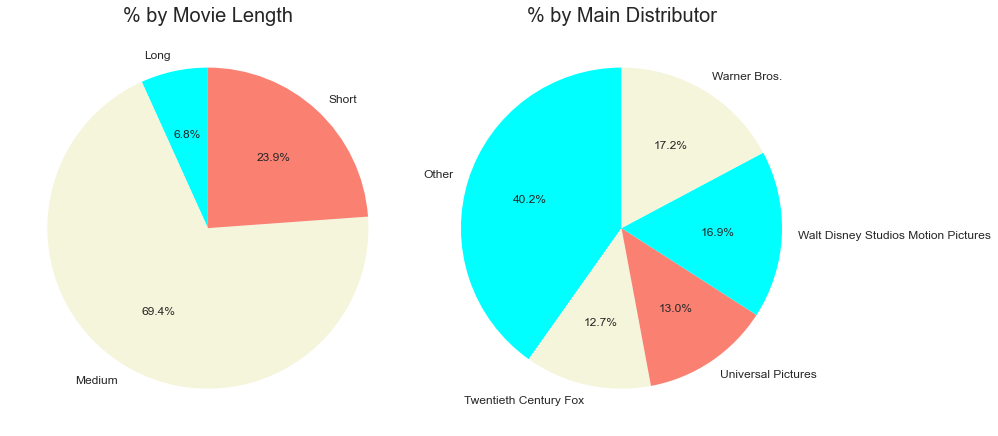

In [66]:

fig, axs = plt.subplots(1, 2, figsize=(14,20))

movie.groupby('sml').size().plot(kind='pie', autopct="%.1f%%",textprops={'fontsize': 12}, colors=['cyan', 'beige', 'salmon'], startangle=90, ylabel='', ax=axs[0])                                

movie.groupby('main_dist').size().plot(kind='pie', autopct="%.1f%%",textprops={'fontsize': 12}, colors=['cyan', 'beige', 'salmon'], startangle=90, ylabel='', ax=axs[1])                                

axs[0].set_title('% by Movie Length', fontsize = 20)
axs[1].set_title('% by Main Distributor', fontsize = 20)
#plt.text(0, 1, "I am Adding Text To The Plot")


fig.tight_layout()

plt.show()

In [67]:
#
# loop over rows and print out the Distributor
#
for lab,row in movie.iterrows() :
    print ("The Distributor for " + str(lab) + " " + str(row['Title']) + "  is  " + str(row['Distributor']))

The Distributor for 0 Star Wars: Episode VII - The Force Awakens (2015)  is  Walt Disney Studios Motion Pictures
The Distributor for 1 Avengers: Endgame (2019)  is  Walt Disney Studios Motion Pictures
The Distributor for 2 Avatar (2009)  is  Twentieth Century Fox
The Distributor for 3 Black Panther (2018)  is  Walt Disney Studios Motion Pictures
The Distributor for 4 Avengers: Infinity War (2018)  is  Walt Disney Studios Motion Pictures
The Distributor for 5 Spider-Man: No Way Home (2021)  is  Sony Pictures Entertainment (SPE)
The Distributor for 6 Titanic (1997)  is  Paramount Pictures
The Distributor for 7 Jurassic World (2015)  is  Universal Pictures
The Distributor for 8 The Avengers (2012)  is  Walt Disney Studios Motion Pictures
The Distributor for 9 Star Wars: Episode VIII - The Last Jedi (2017)  is  Walt Disney Studios Motion Pictures
The Distributor for 10 Incredibles 2 (2018)  is  Walt Disney Studios Motion Pictures
The Distributor for 11 The Lion King (2019)  is  Walt Disney

In [68]:
#
# Add a new column to movie using apply method to 
#
movie["name_length"] = movie["Title"].apply(len)
print (movie[["Title","name_length"]])


                                                 Title  name_length
0    Star Wars: Episode VII - The Force Awakens (2015)           49
1                             Avengers: Endgame (2019)           24
2                                        Avatar (2009)           13
3                                 Black Panther (2018)           20
4                        Avengers: Infinity War (2018)           29
..                                                 ...          ...
913                                The Notebook (2004)           19
914                   Jimmy Neutron: Boy Genius (2001)           32
915                               Eat Pray Love (2010)           20
916                 The Texas Chainsaw Massacre (2003)           34
917                                   Zookeeper (2011)           16

[918 rows x 2 columns]


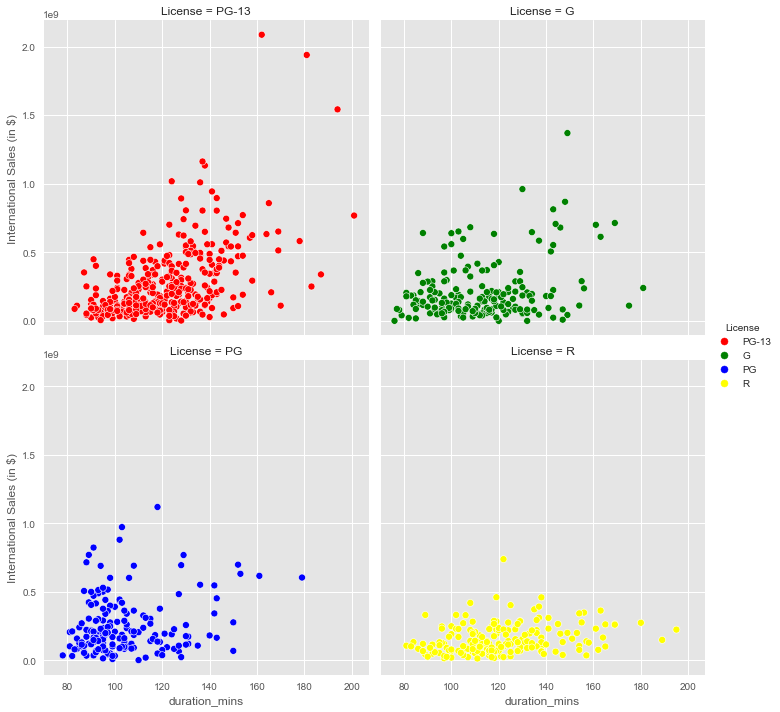

In [69]:
#
# Set the colours for the scatter plots
#

hue_colors={"PG-13":"red","G":"green","PG":"blue","R":"yellow"}
#
# Is there a correlation between the length of the movie and Sales ?
#
sns.relplot(x="duration_mins",y="International Sales (in $)",data=movie,kind='scatter',color='b',col='License',hue='License',palette=hue_colors,col_wrap=2)
plt.show()

In [25]:
#
# print the genre and title columns of the dataframe to see what the Genre column is like in detail
#

movie[['Title','Genre']]

,Title,Genre
0,Star Wars: Episode VII - The Force Awakens (2015),"['Action', 'Adventure', 'Sci-Fi']"
1,Avengers: Endgame (2019),"['Action', 'Adventure', 'Drama', 'Sci-Fi']"
2,Avatar (2009),"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']"
3,Black Panther (2018),"['Action', 'Adventure', 'Sci-Fi']"
4,Avengers: Infinity War (2018),"['Action', 'Adventure', 'Sci-Fi']"
...,...,...
913,The Notebook (2004),"['Drama', 'Romance']"
914,Jimmy Neutron: Boy Genius (2001),"['Action', 'Adventure', 'Animation', 'Comedy',..."
915,Eat Pray Love (2010),"['Biography', 'Drama', 'Romance']"
916,The Texas Chainsaw Massacre (2003),"['Crime', 'Horror']"


In [70]:
#
# What movies are in Thrillers genre
#
thriller_movies=movie[movie['Genre'].str.contains('Thriller')]
thriller_movies


,Unnamed: 0,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,duration_mins,sml,main_dist,name_length
12,12,The Dark Knight (2008),Warner Bros.,"July 16, 2008",534858444,471115201,1005973645,"['Action', 'Crime', 'Drama', 'Thriller']",2 hr 32 min,PG-13,152,Long,Warner Bros.,22
26,26,The Hunger Games: Catching Fire (2013),Lionsgate,"November 15, 2013",424668047,440343699,865011746,"['Action', 'Adventure', 'Drama', 'Sci-Fi', 'Th...",2 hr 26 min,PG-13,146,Medium,Other,38
34,34,The Hunger Games (2012),Lionsgate,"March 8, 2012",408010692,286384032,694394724,"['Action', 'Adventure', 'Sci-Fi', 'Thriller']",2 hr 22 min,PG-13,142,Medium,Other,23
37,37,Jurassic Park (1993),Universal Pictures,"June 11, 1993",404214720,629713583,1033928303,"['Action', 'Adventure', 'Sci-Fi', 'Thriller']",2 hr 7 min,PG-13,127,Medium,Universal Pictures,20
54,54,Furious 7 (2015),Universal Pictures,"April 1, 2015",353007020,1162334379,1515341399,"['Action', 'Thriller']",2 hr 17 min,PG-13,137,Medium,Universal Pictures,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,901,Maze Runner: The Scorch Trials (2015),Twentieth Century Fox,"September 9, 2015",81697192,230598864,312296056,"['Action', 'Adventure', 'Sci-Fi', 'Thriller']",2 hr 11 min,PG-13,131,Medium,Twentieth Century Fox,37
904,904,Unstoppable (2010),Twentieth Century Fox,"November 10, 2010",81562942,86242524,167805466,"['Action', 'Thriller']",1 hr 38 min,PG-13,98,Short,Twentieth Century Fox,18
905,905,Payback (1999),Paramount Pictures,"February 5, 1999",81526121,80100000,161626121,"['Action', 'Crime', 'Drama', 'Thriller']",1 hr 40 min,R,100,Medium,Other,14
907,907,The Talented Mr. Ripley (1999),Paramount Pictures,"December 25, 1999",81298265,47501244,128799509,"['Crime', 'Drama', 'Thriller']",2 hr 19 min,R,139,Medium,Other,30


In [71]:
#
# Get a total of movies in thriller category
#

print("The total number of movies in the Thriller category is : " + str(movie["Genre"].str.contains('Thriller').value_counts()))

The total number of movies in the Thriller category is : False    688
True     230
Name: Genre, dtype: int64


In [72]:
#
# Use Numpy array to perform calculation on Sales to convert to Euros
#
#

np_usd_sales = movie["International Sales (in $)"].values
np_distrib = movie["Distributor"].values
print(type(np_usd_sales))




<class 'numpy.ndarray'>


In [73]:
#
# Convert USD sales to EUR using the user defined function above
#
np_euro_sales=np_usd_sales * convert_curr("USD","EUR")
#
# average sales in euros
#
print("Average International Sales in EUR is : " + str(np.mean(np_euro_sales)))
#
#Print average sales in EUR for the distributor New Line Cinema
#

av_newline=np.mean(np_euro_sales[np_distrib == "New Line Cinema"])
#
#
print("Average International Sales in EURO for New Line Cinema is :" + str(av_newline))



Average International Sales in EUR is : 206553733.43750817
Average International Sales in EURO for New Line Cinema is :154342439.14261904


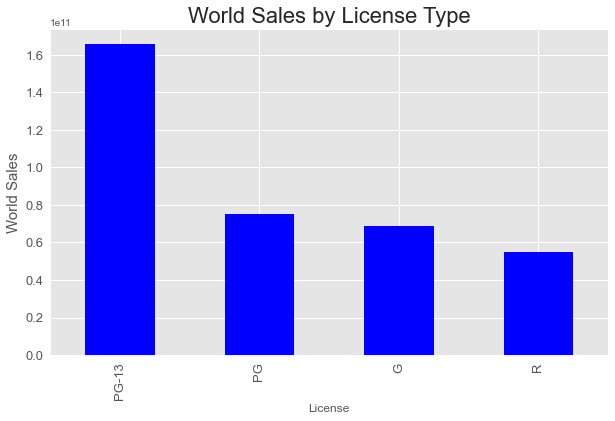

In [74]:
#
# Plot World Sales by License Type
#

df = movie.groupby(['License'])['World Sales (in $)'].sum().sort_values(ascending=False)

ax = df.plot(kind='bar', figsize=(10,6), fontsize=13,color='blue');
ax.set_alpha(0.8)
ax.set_title("World Sales by License Type", fontsize=22)
ax.set_ylabel("World Sales", fontsize=15);
plt.show()

In [75]:
#
# Read in two new CSVs to demonstrate MERGE functionality
# The first sheet contains athletes and some information relating to them and also the Country code (NOC)
# The second sheet holds the Country Name (based on the code NOC)
# We can then use the Country name in our analysis once the two tables are joined
#

athletes=pd.read_csv("athlete_event.csv")
regions=pd.read_csv("regions.csv")



In [76]:
#
# Drop any duplicates
#
#teams.drop_duplicates()
athletes.drop_duplicates()
regions.drop_duplicates()

athletes.tail()
#
# Replace any records with no Weight/Height to the average weight/height
#
mean=athletes["Height"].mean()
athletes['Height'] = athletes['Height'].fillna(mean)

mean_weight=athletes["Weight"].mean()
athletes['Weight'] = athletes['Weight'].fillna(mean_weight)






In [34]:

#
# MERGE example
#
#
# Merge athlete events dataframe with the list of regions/countries to get name of country
#

ath_merge=athletes.merge(regions,on=["NOC"],validate="many_to_one",suffixes=("_ath","_reg"))
ath_merge



     

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.00000,75.000000,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.00000,62.000000,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.00000,54.000000,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270762,120575,Mamorallo Tjoka,F,23.0,150.00000,56.000000,Lesotho,LES,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
270763,120575,Mamorallo Tjoka,F,27.0,150.00000,56.000000,Lesotho,LES,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
270764,122166,M'apotlaki Ts'elho,F,15.0,175.33897,70.702393,Lesotho,LES,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Lesotho,NaN
270765,122215,Lefa Tsapi,M,23.0,170.00000,63.000000,Lesotho,LES,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN


In [77]:

#
# Pick out records from the merged table where Country is RUSSIA/USA/UK and where gold medal was received
#

GoldMedals = ath_merge[(ath_merge.Medal == 'Gold')]
CountryMedals=ath_merge[((ath_merge.region=="Russia") | (ath_merge.region == "USA") | (ath_merge.region == "UK")) & (ath_merge.Medal == 'Gold')]
CountryMedals

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
14572,150,Margaret Ives Abbott (-Dunne),F,23.0,175.33897,70.702393,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
14581,351,Julius Shareef Abdur-Rahim,M,23.0,202.00000,104.000000,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,USA,NaN
14584,404,"Louis Grenville ""Lou"" Abell",M,15.0,175.33897,70.702393,Vesper Boat Club,USA,1900 Summer,1900,Summer,Paris,Rowing,Rowing Men's Coxed Eights,Gold,USA,NaN
14585,404,"Louis Grenville ""Lou"" Abell",M,19.0,175.33897,70.702393,Vesper Boat Club,USA,1904 Summer,1904,Summer,St. Louis,Rowing,Rowing Men's Coxed Eights,Gold,USA,NaN
14586,423,Michael Brent Abernathy,M,22.0,182.00000,84.000000,United States,USA,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,Gold,USA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214913,131696,Dorothy Winifred Wright (Machin-),F,30.0,175.33897,70.702393,Ancora,GBR,1920 Summer,1920,Summer,Antwerpen,Sailing,Sailing Mixed 7 metres,Gold,UK,NaN
214917,131699,Edward Gordon Dundas Wright,M,27.0,175.33897,70.702393,Great Britain,GBR,1912 Summer,1912,Summer,Stockholm,Football,Football Men's Football,Gold,UK,NaN
214949,131944,"James Robert ""Bob"" Wyman",M,26.0,175.33897,67.000000,Great Britain,GBR,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold,UK,NaN
214962,132652,"Elizabeth Anne ""Lizzy"" Yarnold",F,25.0,172.00000,78.000000,Great Britain,GBR,2014 Winter,2014,Winter,Sochi,Skeleton,Skeleton Women's Skeleton,Gold,UK,NaN


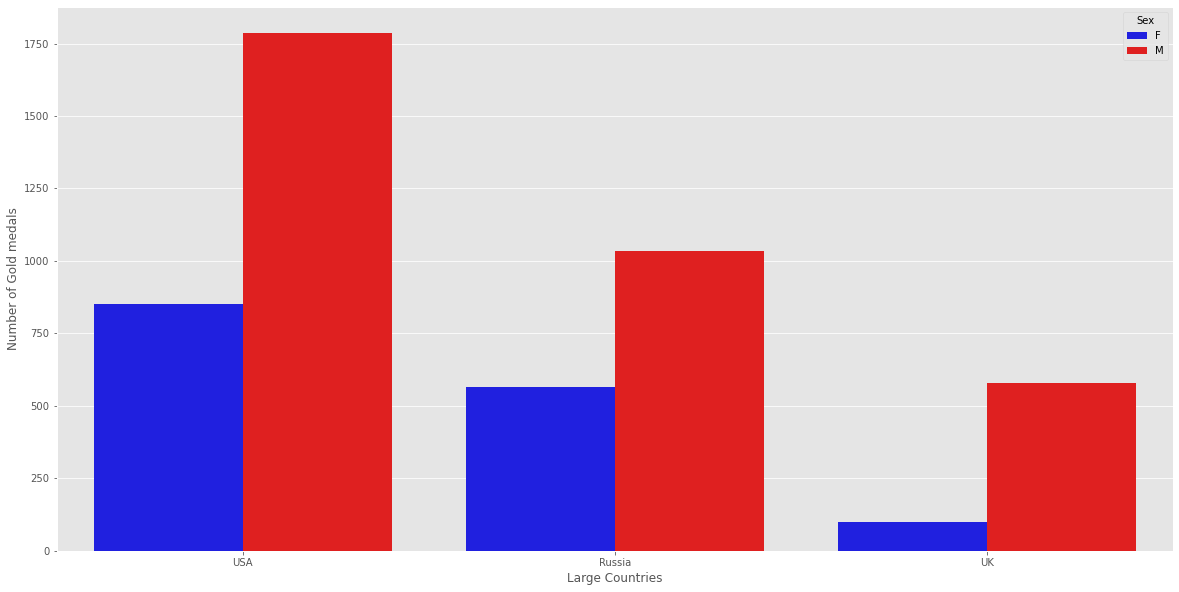

In [36]:

plt.figure(figsize=(20, 10))
plt.tight_layout()
ax=sns.countplot(data=CountryMedals, x='region', hue='Sex',palette=["blue","red"])
ax.set(xlabel="Large Countries", ylabel="Number of Gold medals")
plt.show()

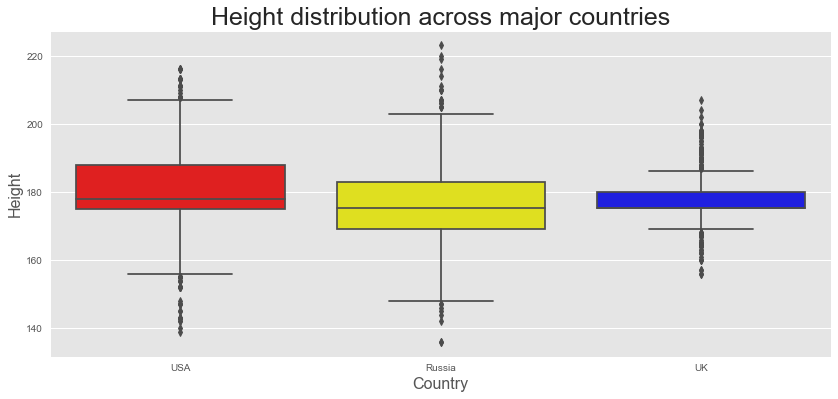

In [78]:
#
# Analyse the distribution of heights according to Country
#

plt.figure(figsize=(14,6)) 
#ax = sns.boxplot(x="region", y = "Height" ,data =CountryMedals, palette= "RdYlBu")
ax = sns.boxplot(x="region", y = "Height" ,data =CountryMedals, palette= ["red","yellow","blue"])
ax.set_title("Height distribution across major countries", fontsize = 25)
ax.set_xlabel(xlabel = "Country", fontsize = 16)
ax.set_ylabel(ylabel = "Height", fontsize = 16)
plt.show()

In [79]:
#
# IMPORTING a new dataset to get Time Series Data
#
#

ss = pd.read_csv("supermarket_sales.csv")

#
# Get information on dataset
#
print (ss.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [80]:
#
# Get some summary statistics about Sales
#
print(ss.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

In [81]:
# are there missing values

print(ss.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [42]:
ss.drop_duplicates()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03/02/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02/09/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [82]:
#
# Group data by City and then sum Total and show list by City in descending order
#

#sorted_ss=ss.groupby(['City','Product line']).sum()['Total'].sort_values(ascending=False)
sorted_ss=ss.groupby(['Product line']).sum()['Total'].sort_values(ascending=False)
sorted_ss

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

In [83]:
#

# WHat is the min max and total sales by city by product line
#
#
ss.groupby(["City","Product line"])["Total"].agg([min,max,sum])

min        max         sum
City      Product line                                          
Mandalay  Electronic accessories  26.7225   942.4485  17051.4435
          Fashion accessories     35.1960   874.1250  16413.3165
          Food and beverages      56.4060   888.6150  15214.8885
          Health and beauty       18.6375   922.6350  19980.6600
          Home and lifestyle      33.9360  1022.4900  17549.1645
          Sports and travel       34.6290   944.6220  19988.1990
Naypyitaw Electronic accessories  31.7520   864.5700  18968.9745
          Fashion accessories     13.1670  1042.6500  21560.0700
          Food and beverages      22.6590  1034.4600  23766.8550
          Health and beauty       32.2770   950.2500  16615.3260
          Home and lifestyle      14.6790  1023.7500  13895.5530
          Sports and travel       10.6785  1002.1200  15761.9280
Yangon    Electronic accessories  30.4080   931.0350  18317.1135
          Fashion accessories     12.6945  1039.2900  16332.5085
          Food and beverages      33.4320   932.3370  17163.1005
          Health and beauty       19.2465   752.6400  12597.7530
          Home and lifestyle      19.1940   951.8250  22417.1955
          Sports and travel       16.1070   926.9505  19372.6995

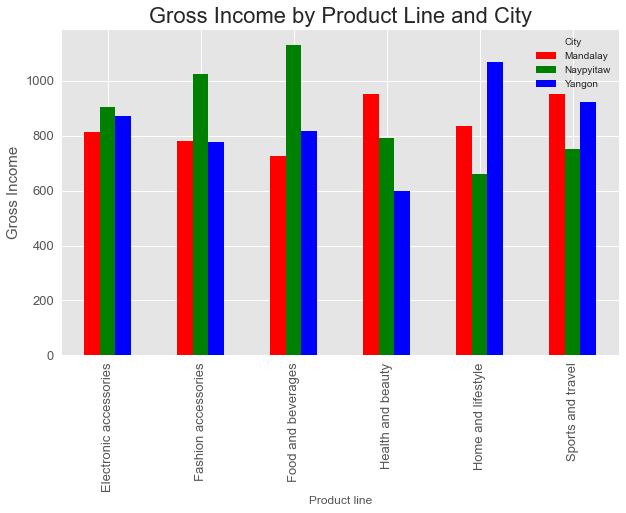

In [84]:

#
# Chart Gross income across each of the product lines and indicate breakdown by City
#
df = ss.groupby(['Product line', 'City'])['gross income'].sum().unstack('City').fillna(0)

col_palette={"red","blue","green"}
ax = df.plot(kind='bar', figsize=(10,6), fontsize=13,color=col_palette);
ax.set_alpha(0.8)
ax.set_title("Gross Income by Product Line and City", fontsize=22)
ax.set_ylabel("Gross Income", fontsize=15);
plt.show()

In [85]:
#
# Converting 'Order Date' and 'Ship Date' to datetime
#
ss['Date'] = pd.to_datetime(ss['Date'], format='%m/%d/%Y')



In [86]:
total_month = ss.groupby(['City', pd.Grouper(key='Date', freq='M')])['Total'].sum().reset_index() #groups total City by sales, on a monthly basis
total_month



,City,Date,Total
0,Mandalay,2019-01-31,37176.0585
1,Mandalay,2019-02-28,34424.2710
2,Mandalay,2019-03-31,34597.3425
3,Naypyitaw,2019-01-31,40434.6810
4,Naypyitaw,2019-02-28,32934.9825
5,Naypyitaw,2019-03-31,37199.0430
6,Yangon,2019-01-31,38681.1285
7,Yangon,2019-02-28,29860.1205
8,Yangon,2019-03-31,37659.1215


In [87]:
#
# create an array with each City value
#

cities = ss['City'].unique() 


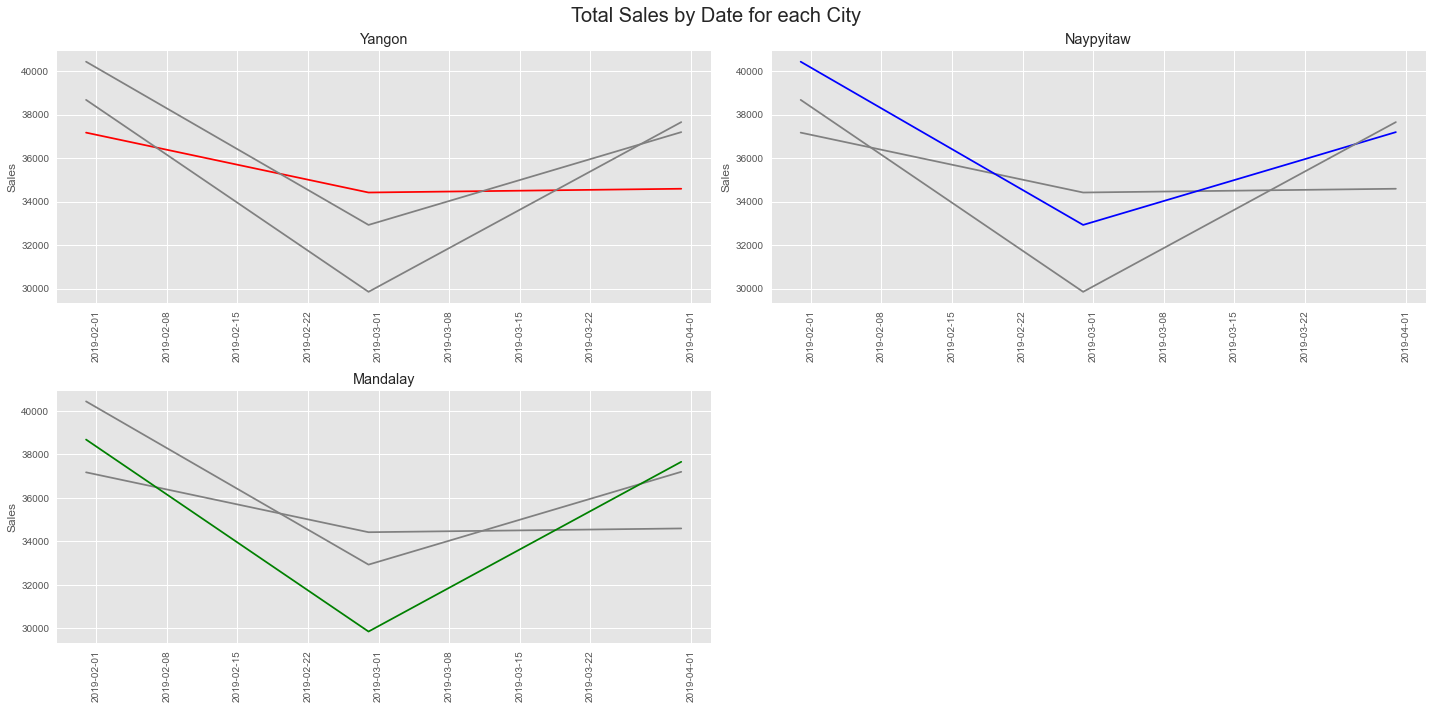

In [88]:
#
# Analyse Total Sales by city and product type - use a subplot for ease of comparison
#
plt.subplots(3, 1, figsize=(20, 10))
sns.set_palette("RdBu")
col_pall = ['grey','grey','grey']
col_palette=['red','blue','green']

for i, s in enumerate(cities):
    plt.subplot(2, 2, i+1) #since it's going to display 2 on each row, we want the total rows to be half the variables, hence 'nrows'
    color_list = col_pall.copy() #copy of the 'col', t not override the original
    color_list[i] = col_palette[i] #replaces the color of the city that is being plotted
    plot=sns.lineplot(data = total_month, x = 'Date', y = 'Total', hue = 'City', palette = color_list, legend=False,markers=True)
    plt.setp(plot.get_xticklabels(),rotation=90)
    plt.title(s) #title of the subplot is the name of the current City being plotted
    
    plt.xlabel(None)
    plt.ylabel("Sales")

plt.suptitle("Total Sales by Date for each City", size=20)
plt.tight_layout()
plt.show()

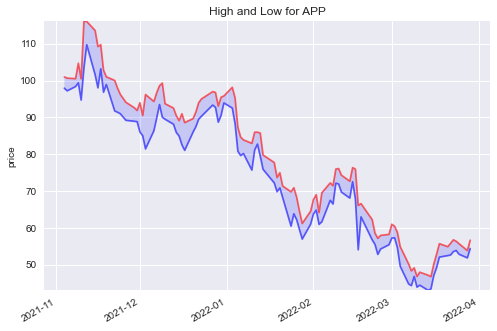

In [89]:
#
#
# Demonstrate API by getting price data for APP using the TIME_SERIES_DAILY API
#

symbol="APP"

t = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=APP&interval=5min&apikey=CKHV6XI8ZI3ETX1V")
#
dict=t.json()



from datetime import datetime
dis_dicts=(dict['Time Series (Daily)'])
dis_dates,close,high,low = [], [],[],[]
for date in dis_dicts:
    dis_dates.append(datetime.strptime(date,'%Y-%m-%d'))
    close.append(float(dis_dicts[date]['4. close']))
    high.append(float(dis_dicts[date]['2. high']))
    low.append(float(dis_dicts[date]['3. low']))


plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dis_dates,high,c='red',alpha=0.6)
ax.plot(dis_dates,low,c='blue',alpha=0.6)
ax.fill_between(dis_dates,high,low,facecolor='blue',alpha=0.15)
ax.set_title('High and Low for ' + symbol)
ax.set_xlabel('',fontsize=15)
fig.autofmt_xdate()
ax.set_ylabel("price",fontsize=10)
ax.tick_params(axis='both',which='major',labelsize=10)
plt.ylim(min(low),max(high))

plt.show()


In [90]:
#
# WEB Scraping
#


from bs4 import BeautifulSoup
#
# This website contains a description of corona restrictions by Country
# The country is referenced by the tag <h3>
#

url="https://www.aljazeera.com/news/2020/6/3/coronavirus-travel-restrictions-border-shutdowns-by-country"

r=requests.get(url)

#
# Check to see if we are getting through to web page (should see a status code of 200)
#

#print(r.status_code)

#
# Parse components of the web page using BeautifulSoup
#

soup=BeautifulSoup(r.content,'html.parser')

#print(soup.prettify())

#
# Initialise a dataframe to hold the data once we have parsed it
# The date will have 2 columns 1) Country and 2) description of the restriction
# Each incidence of <h3> tag will indicate a new country
# The restriction is held against the tag <p> - there can be many of these per <h3> so I am appending each value to the previous
# until I reach another <h3> tag
#

df = pd.DataFrame(columns =['Country', 'Restriction'])
country = []
restriction = []
flag = 0

#
# Loop through each instance of <h3> i.e. per country
#
for link in soup.find_all("h3"):
    if flag == 0:
        country.append(link.get_text())
#
# Each time you come across a new instance of <h3> you add the name of the country to the list of countries
#
        next_sib = link.find_next_sibling(['p', 'h3'])
        #print(next_sib.get_text())
        #
        # Initialise 'text' at each change in country
        #
        text = []
        # loop to go through all paragraphs that come after a h3 tag - fall out of loop when you hit the next h3 tag
        # append each piece of text to the previous to get the full description of the restriction
        # break out of the loop when you do not find any more data
        #
        while next_sib.name != 'h3':
            text.append(next_sib.get_text())
            next_sib = next_sib.find_next_sibling(['p','h3'])
            if next_sib is None :
                flag = 1
                break
                #
                # Append the text to the restriction list
        restriction.append(' '.join(text))
    else:
        break
#
# Now finally set the 2 columns of the dataframe defined above to the resultig 2 lists
#
df['Country'] = country
df['Restriction'] = restriction
#
# Lets see what the restriction is for Austria and Spain

print(df[((df.Country =="Austria") | (df.Country == "Spain"))])



     Country                                        Restriction
9    Austria  Foreign travellers from outside the Schengen a...
122    Spain  Spain will restrict entry for most foreigners ...
